In [73]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm


#to ignore sklearn warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

NOTE: CHANGED THE PATH OF MUSHROOM.MAP BELOW

In [16]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


NOTE: CHANGED THE PATH OF MUSHROOM.DATA BELOW

In [19]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape

(7000, 126) (1124, 126)


In [34]:
def P1():
### STUDENT START ###

    n_comp =50
    pca = PCA(n_components=n_comp)
    pca.fit(train_data)
    collect_all = []
    for i in range(1, n_comp+1):
        collect = np.sum(pca.explained_variance_ratio_[:i])
        collect_all.append(collect)
        print "Variance explained for k={0:2d}: {1:.4f} " \
              .format(i, collect)

### STUDENT END ###

P1()

Variance explained for k= 1: 0.1640 
Variance explained for k= 2: 0.2973 
Variance explained for k= 3: 0.3990 
Variance explained for k= 4: 0.4696 
Variance explained for k= 5: 0.5083 
Variance explained for k= 6: 0.5451 
Variance explained for k= 7: 0.5764 
Variance explained for k= 8: 0.6037 
Variance explained for k= 9: 0.6299 
Variance explained for k=10: 0.6522 
Variance explained for k=11: 0.6727 
Variance explained for k=12: 0.6914 
Variance explained for k=13: 0.7087 
Variance explained for k=14: 0.7256 
Variance explained for k=15: 0.7408 
Variance explained for k=16: 0.7558 
Variance explained for k=17: 0.7701 
Variance explained for k=18: 0.7843 
Variance explained for k=19: 0.7975 
Variance explained for k=20: 0.8090 
Variance explained for k=21: 0.8197 
Variance explained for k=22: 0.8303 
Variance explained for k=23: 0.8407 
Variance explained for k=24: 0.8507 
Variance explained for k=25: 0.8598 
Variance explained for k=26: 0.8685 
Variance explained for k=27: 0.8764 
V

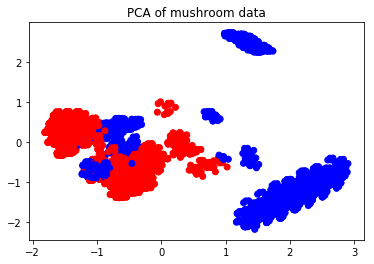

In [46]:
def P2():
### STUDENT START ###

    pca = PCA(n_components=2)
    proj_train_data = pca.fit_transform(train_data)

    plt.clf()
    colors = np.array(['r', 'b'])
    plt.scatter(proj_train_data[:, 0], proj_train_data[:, 1], c=colors[train_labels])
    plt.title("PCA of mushroom data")
    
    
### STUDENT END ###

P2()

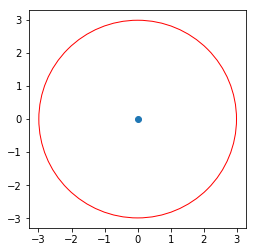

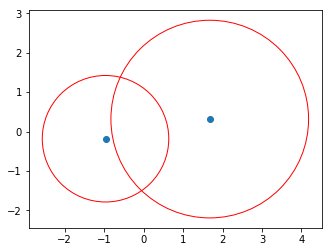

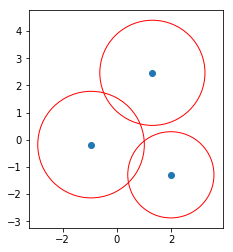

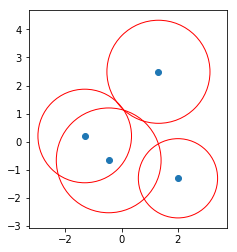

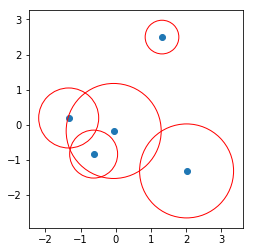

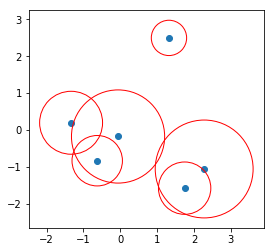

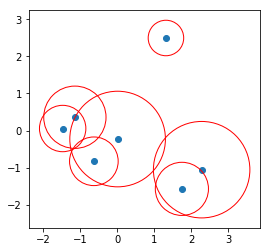

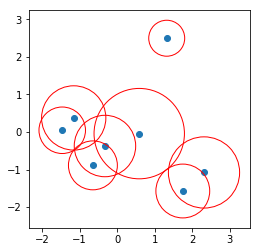

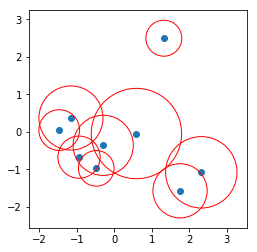

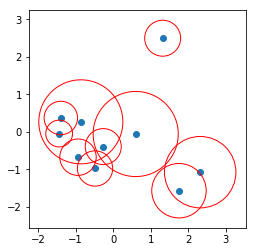

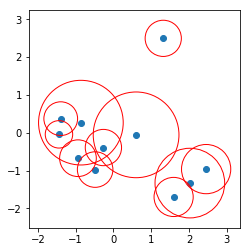

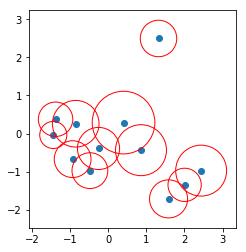

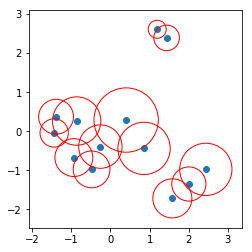

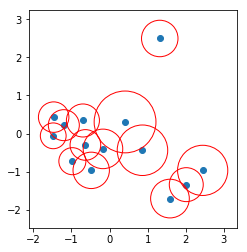

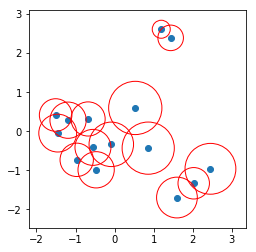

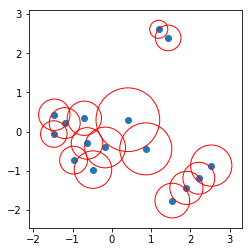

In [58]:
def P3():
### STUDENT START ###
    pca = PCA(n_components=2)
    proj_train_data = pca.fit_transform(train_data)
    
    #remember for loop requires 1 excess value for upperbound
    for value in range(1,17):
        
        kmeans = KMeans(n_clusters=value)
        cluster = kmeans.fit(proj_train_data)
        labels= kmeans.labels_
        distance = kmeans.transform(proj_train_data)
        max_d = getMaxDist(value,distance,labels)
        center = kmeans.cluster_centers_
        for i in range(len(max_d)):
            plt.gca().add_patch(plt.Circle((center[i,0],center[i,1]),radius=max_d[i],fc="none",edgecolor='r'))
        plt.scatter(center[:,0],center[:,1])
        plt.axis('scaled')
        plt.show()
        plt.close()
    
def getMaxDist(clusters, dist,labs):
    max_dist = np.zeros(clusters)
    for cluster in range(clusters):
        eq = np.equal(labs,cluster)
        cluster_n = dist[eq,:]
        max_dist[cluster] = np.max(cluster_n[:,cluster])
    return max_dist

### STUDENT END ###

P3()

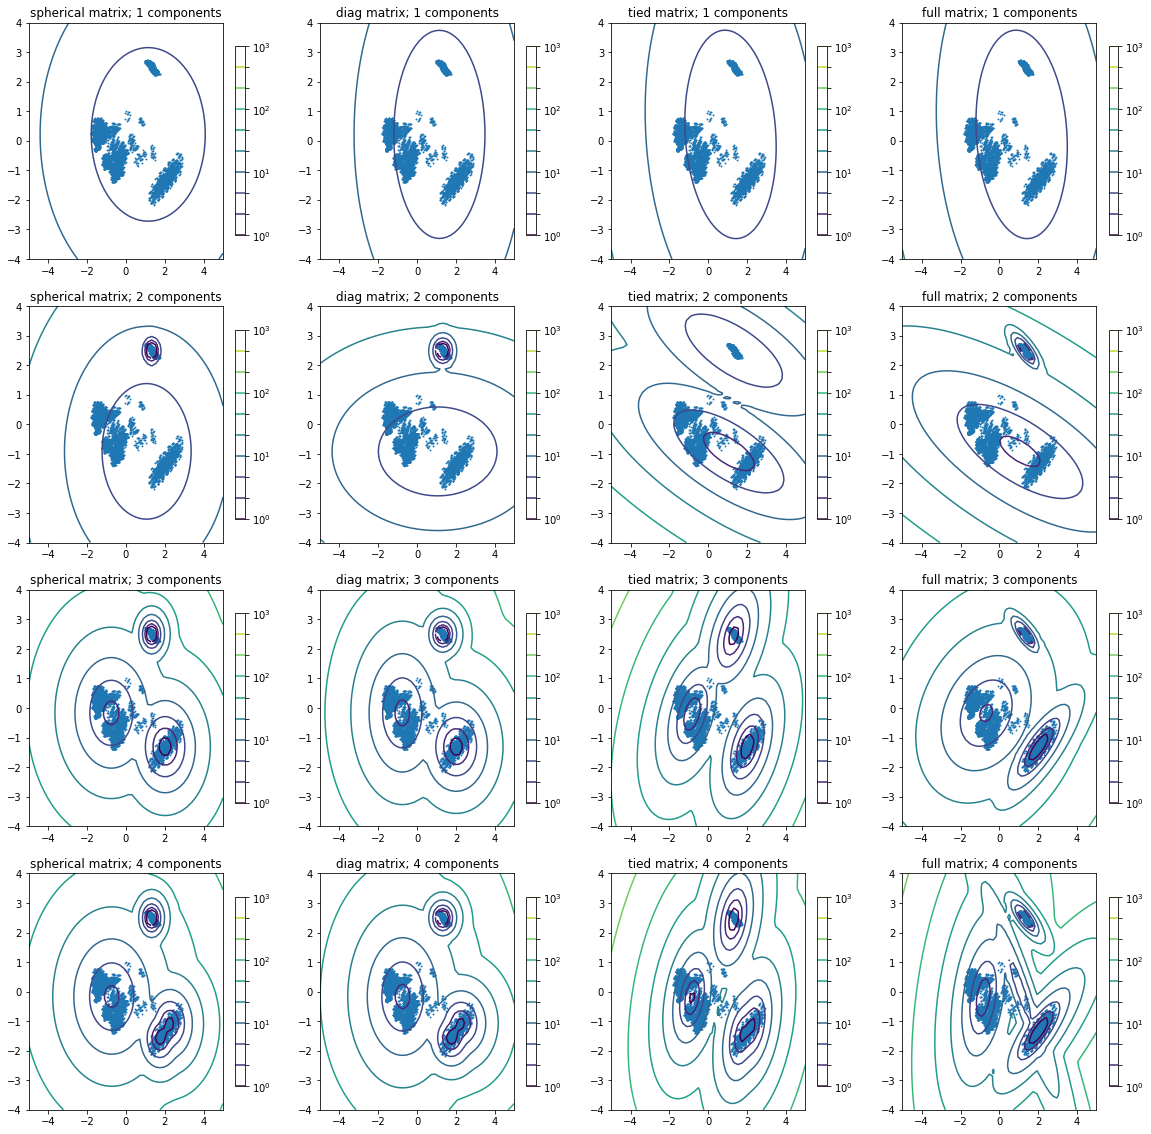

In [87]:
def P4():
### STUDENT START ###

    pca = PCA(n_components=2)
    proj_train_data = pca.fit_transform(train_data)
    
    # Gaussian Mixture Model & plot estimated density curves
    covariance_types = ["spherical", "diag", "tied", "full"]
    plt.figure(figsize=(20, 20))
    for n in range(1,5):
        for i, type_covar in enumerate(covariance_types):
            gmm = GMM(n_components=n, covariance_type=type_covar)
            gmm.fit(proj_train_data[train_labels == 1,:])

            # Display predicted scores by the model as a contour plot.
            x = np.linspace(-5.0, 5.0)
            y = np.linspace(-4.0, 4.0)
            X_grid, Y_grid = np.meshgrid(x, y)
            XX = np.array([X_grid.ravel(), Y_grid.ravel()]).T
            Z = -gmm.score_samples(XX)[0]
            Z = Z.reshape(X_grid.shape)

            ax = plt.subplot(4, 4, (4*(n-1)) + i + 1)
            plt.title("{0} matrix; {1} components".format(type_covar, n))
            CS = plt.contour(X_grid, Y_grid, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(proj_train_data[:, 0], proj_train_data[:, 1], .8)

### STUDENT END ###

P4()

In [83]:
def P5():
### STUDENT START ###

    pca = PCA(n_components=2)
    proj_train_data = pca.fit_transform(train_data)
    proj_test_data = pca.transform(test_data)
    
    # 4-component full covariance GMM (positive)
    pos_gmm = GMM(n_components=4, covariance_type="full")
    pos_gmm.fit(proj_train_data[train_labels == 1,:])
    pos_scores = pos_gmm.score(proj_test_data)
    
    # 4-component full covariance GMM (negative)
    neg_gmm = GMM(n_components=4, covariance_type="full")
    neg_gmm.fit(proj_train_data[train_labels == 0,:])
    neg_scores = neg_gmm.score(proj_test_data)
    
    # joining scores from GMMs --> one array
    gmm_scores = np.column_stack((neg_scores, pos_scores))
    
    # label prediction based on which GMM has larger prob
    preds = np.argmax(gmm_scores, axis=1)
    
    # accuracy = (total - num_incorrect) / total.
    incorrect = np.sum(abs(preds - test_labels))
    print "Num incorrect: {0}".format(incorrect)
    accuracy = float(preds.shape[0] - incorrect) / preds.shape[0]
    print "Accuracy: {0}".format(accuracy)

### STUDENT END ###

P5()

Num incorrect: 55
Accuracy: 0.951067615658


In [89]:
def GMMAccuracy(pca_components, gmm_components, covar_type):
    # Project training and test data to pca_components dimensions.
    pca = PCA(n_components=pca_components)
    proj_train_data = pca.fit_transform(train_data)
    proj_test_data = pca.transform(test_data)
    
    # GMM (positive)
    pos_gmm = GMM(n_components=gmm_components, covariance_type=covar_type)
    pos_gmm.fit(proj_train_data[train_labels == 1,:])
    pos_scores = pos_gmm.score(proj_test_data)

    # GMM (negative)
    neg_gmm = GMM(n_components=gmm_components, covariance_type=covar_type)
    neg_gmm.fit(proj_train_data[train_labels == 0,:])
    neg_scores = neg_gmm.score(proj_test_data)

    # Combine scores from GMMs into one array.
    gmm_scores = np.column_stack((neg_scores, pos_scores))

    # Predict labels based off of which GMM gave larger prob.
    preds = np.argmax(gmm_scores, axis=1)

    # Compute accuracy = (total - num_incorrect) / total.
    incorrect = np.sum(abs(preds - test_labels))
    accuracy = float(preds.shape[0] - incorrect) / preds.shape[0]
    return accuracy

def n_params(pca_components, gmm_components, type_covar):
        """Return the number of free parameters in the model."""
        ndim = pca_components
        if type_covar == 'full':
            params_covar = gmm_components * ndim * (ndim + 1) / 2.
        
        elif type_covar == 'diag':
            params_covar = gmm_components * ndim
        
        elif type_covar == 'tied':
            params_covar = ndim * (ndim + 1) / 2.
        
        elif type_covar == 'spherical':
            params_covar = gmm_components
        mean_params = ndim * gmm_components
        return int(params_covar + mean_params + gmm_components - 1)*2

def P6():
### STUDENT START ###
    covariance_types = ["spherical", "diag", "tied", "full"]
    accuracies = []
    print "------------------------------------------------------------------------------------------"
    print "{0:<20s}{1:<20s}{2:<20s}{3:<20s}{4:<20s}".format(
            "PCA Components", "GMM Components", "Covariance Type", "# Params", "Accuracy")
    print "------------------------------------------------------------------------------------------"
    for pca_components in range(1,6):
        for gmm_components in range(1,6):
            for type_covar in covariance_types:
                num_parameters = n_params(pca_components, gmm_components, type_covar)
                if num_parameters > 50:
                    continue
                accuracy = GMMAccuracy(pca_components, gmm_components, type_covar)
                accuracies.append(accuracy)
                print "{0:<20}{1:<20}{2:<20}{3:<20}{4:<.5f}".format(
                    pca_components, gmm_components, type_covar, num_parameters, accuracy)
    


### STUDENT END ###

P6()

------------------------------------------------------------------------------------------
PCA Components      GMM Components      Covariance Type     # Params            Accuracy            
------------------------------------------------------------------------------------------
1                   1                   spherical           4                   0.84431
1                   1                   diag                4                   0.84431
1                   1                   tied                4                   0.84431
1                   1                   full                4                   0.84431
1                   2                   spherical           10                  0.89947
1                   2                   diag                10                  0.89947
1                   2                   tied                8                   0.88434
1                   2                   full                10                  0.89947
1            